In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
raw_data = pd.read_csv(data_url, skiprows=1)

In [2]:
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202121          7   6232     3541    8923       9           5   
1     202120          7   7519     4624   10414      11           7   
2     202119          7   6654     4370    8938      10           7   
3     202118          7   3912     2110    5714       6           3   
4     202117          7   4686     2878    6494       7           4   
5     202116          7   4780     2891    6669       7           4   
6     202115          7  11215     7627   14803      17          12   
7     202114          7  11197     7994   14400      17          12   
8     202113          7   9714     6289   13139      15          10   
9     202112          7  11520     8415   14625      17          12   
10    202111          7   9386     6678   12094      14          10   
11    202110          7   9056     6452   11660      14          10   
12    202109          7  10988     7938   14038      17          12   
13    202108          7  11281     8361   14201      17          13   
14    202107          7  13561    10315   16807      21          16   
15    202106          7  13401     9810   16992      20          15   
16    202105          7  12210     8988   15432      18          13   
17    202104          7  12026     8826   15226      18          13   
18    202103          7   8913     6375   11451      13           9   
19    202102          7   7795     5430   10160      12           8   
20    202101          7  10525     7750   13300      16          12   
21    202053          7  11978     8406   15550      18          13   
22    202052          7  12012     8285   15739      18          12   
23    202051          7  10564     7574   13554      16          11   
24    202050          7   7063     4744    9382      11           7   
25    202049          7   5026     3145    6907       8           5   
26    202048          7   6683     4312    9054      10           6   
27    202047          7   4999     2963    7035       8           5   
28    202046          7   3752     1963    5541       6           3   
29    202045          7   3696     2016    5376       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1561  199126          7  17608    11304   23912      31          20   
1562  199125          7  16169    10700   21638      28          18   
1563  199124          7  16171    10071   22271      28          17   
1564  199123          7  11947     7671   16223      21          13   
1565  199122          7  15452     9953   20951      27          17   
1566  199121          7  14903     8975   20831      26          16   
1567  199120          7  19053    12742   25364      34          23   
1568  199119          7  16739    11246   22232      29          19   
1569  199118          7  21385    13882   28888      38          25   
1570  199117          7  13462     8877   18047      24          16   
1571  199116          7  14857    10068   19646      26          18   
1572  199115          7  13975     9781   18169      25          18   
1573  199114          7  12265     7684   16846      22          14   
1574  199113          7   9567     6041   13093      17          11   
1575  199112          7  10864     7331   14397      19          13   
1576  199111          7  15574    11184   19964      27          19   
1577  199110          7  16643    11372   21914      29          20   
1578  199109          7  13741     8780   18702      24          15   
1579  199108          7  13289     8813   17765      23          15   
1580  199107          7  12337     8077   16597      22          15   
1581  199106          7  10877     7013   14741      19          12   
1582  199105          7  10442     6544   14340      18          11   
1583  199104          7   7913     4563   11263      14           8   
1584  199103          7  15387    10484   20290      27          18   
1585  199102          7  16277  

In [3]:
raw_data[raw_data.isnull().any(axis=1)] 

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [4]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

NameError: name 'data' is not defined

In [5]:
data = raw_data.dropna().copy()

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
sorted_data = data.set_index('period').sort_index() 

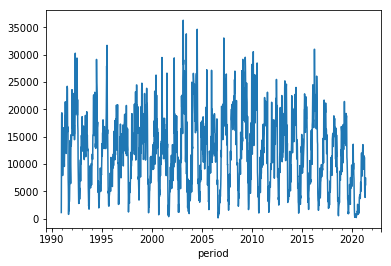

In [8]:
sorted_data['inc'].plot()

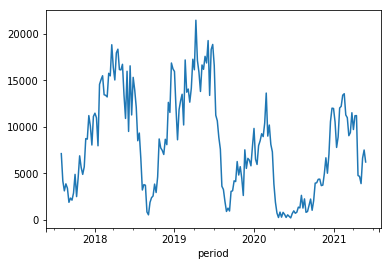

In [9]:
sorted_data['inc'][-200:].plot()

In [10]:
 first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

AssertionError: 

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

AssertionError: 

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    #assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

In [14]:
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

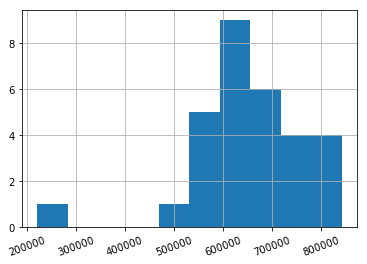

In [15]:
yearly_incidence.hist(xrot=20)

In [16]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

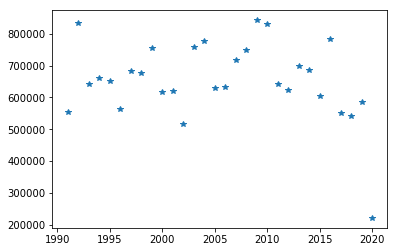

In [17]:
yearly_incidence.plot(style='*') 